### 自回归(AR)
### 移动平均(MA)
### 自回归移动平均(ARMA)
### 差分自回归移动平均模型(ARIMA)
### 季节性差分自回归移动平均模型(SARIMA)

## 原始数据、季节差分后和一次差分后

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False
from arch.unitroot import ADF
df = pd.read_excel('C:\\Users\\Administrator\\Desktop\\时序.xlsx')
ADF(df.iloc[:,0])#p值为0小于0.05认为是平稳的
print('ACF:',ADF(df.iloc[:,0]))

ACF:    Augmented Dickey-Fuller Results   
Test Statistic                 -8.420
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


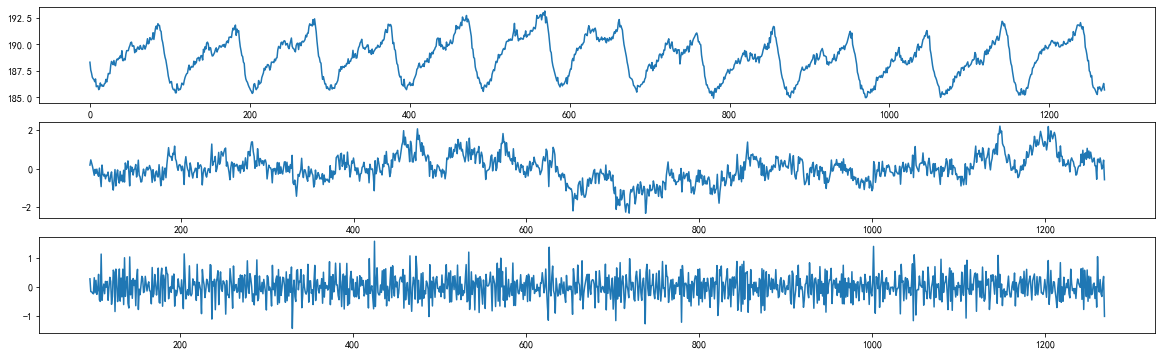

In [2]:

diff_96 = df.iloc[:,0].diff(95)#季节性差分
diff_96 = diff_96.dropna()

diff_ = diff_96.diff()#一次差分
diff_ = diff_.dropna()

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(311)#原始数据图
ax1.plot(df.iloc[:,0])
ax2 = fig.add_subplot(312)#季节性查分差分后 无周期性 但是不平稳
ax2.plot(diff_96)
ax3 = fig.add_subplot(313)#再一次差分之后 平稳
ax3.plot(diff_)
plt.show()

## ACF图 PACF图
### 确定时间序列模型参数

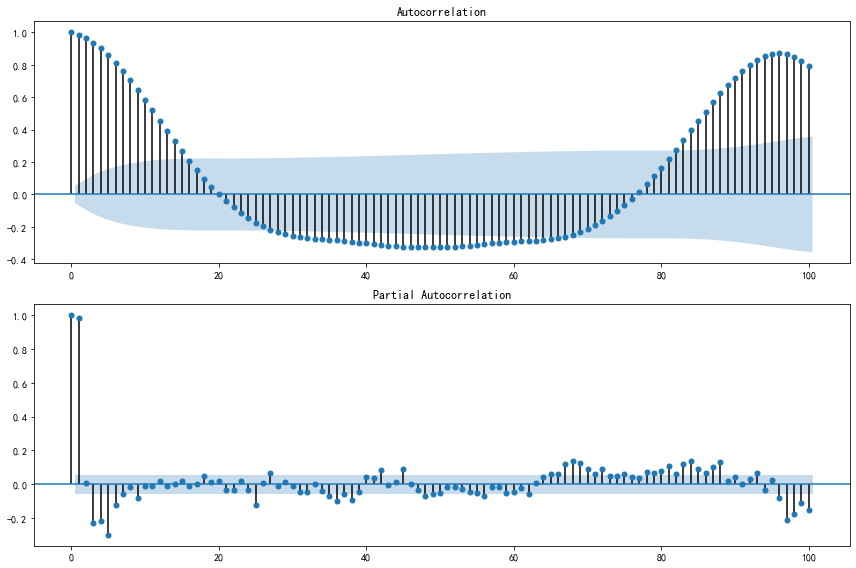

In [3]:

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.iloc[:,0],lags = 100,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.iloc[:,0], lags = 100,ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

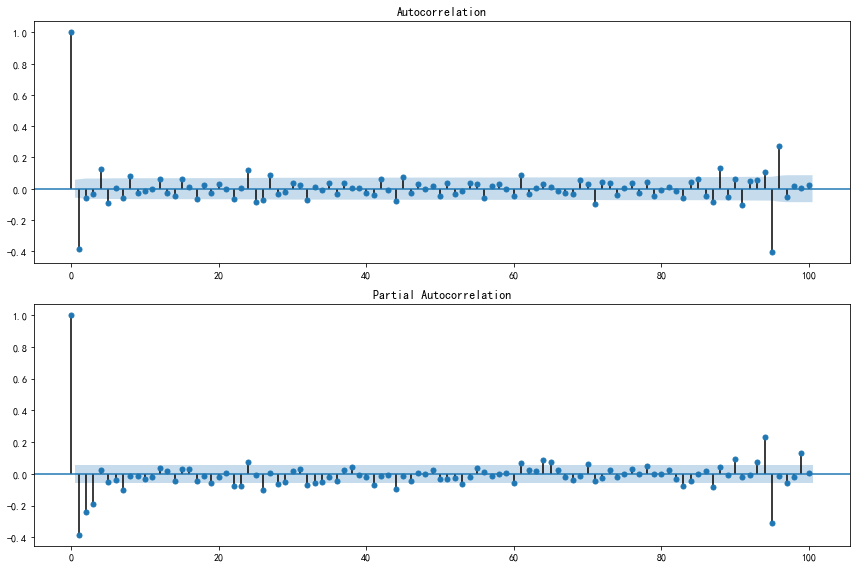

In [4]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_,lags = 100,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_, lags = 100,ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()
# pq看季节性差分和差分之后的
# PQ看季节性差分之后的
# 由ACF：滞后1和95即可，故qQ均为1
# 由PACF：

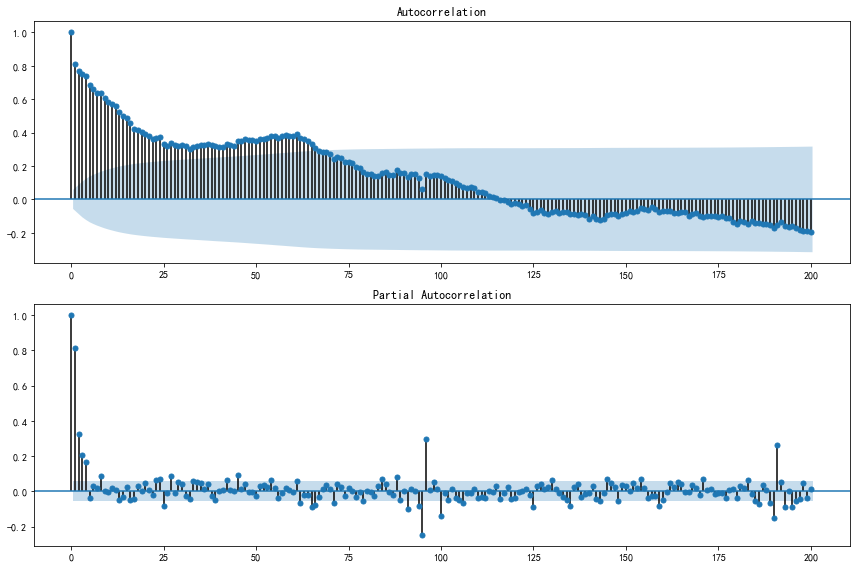

In [5]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_96,lags = 200,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_96, lags = 200,ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()
# 由ACF：95处显著，190处不显著，故Q=1
# 由PACF：95和190均显著，故P=1，2均可能

## 模型训练及预测

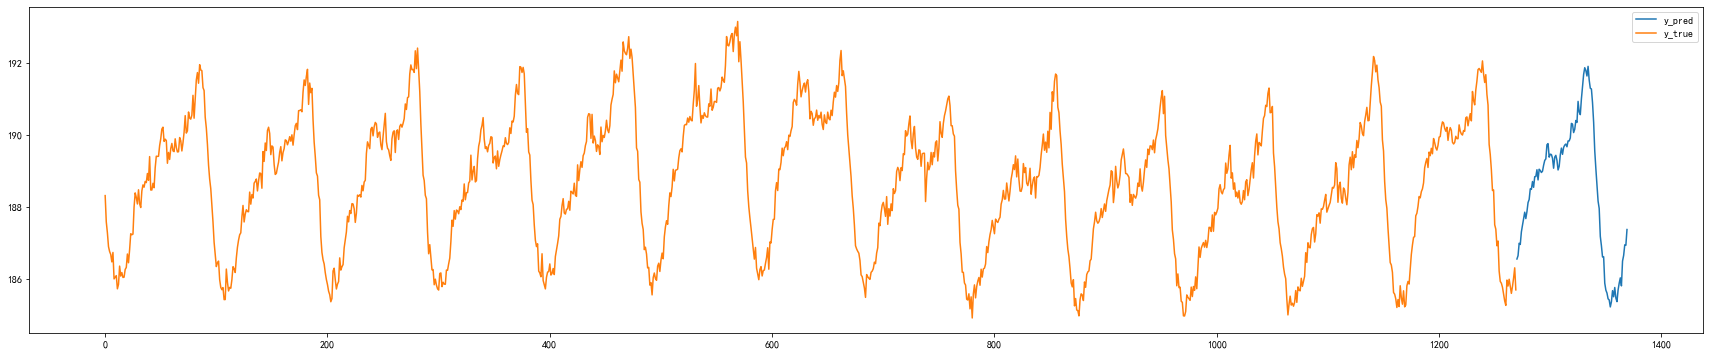

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.externals import joblib
#model = SARIMAX(diff_, order=(1, 0, 1), seasonal_order=(0, 0, 1, 95))
model = SARIMAX(df.iloc[:,0], order=(1, 1, 1), seasonal_order=(1, 1, 0, 95))#与上一句等价
results = model.fit()
joblib.dump(results, f'C:\\Users\\Administrator\\Desktop\\sARIMA模型.pkl')
predict_ = results.forecast(100)

fig, ax = plt.subplots(figsize=(30,6))
ax = predict_.plot(ax=ax)
df.iloc[:,0].plot(ax=ax)
plt.legend(['y_pred', 'y_true'])
plt.show()

https://blog.csdn.net/itnerd/article/details/104715508


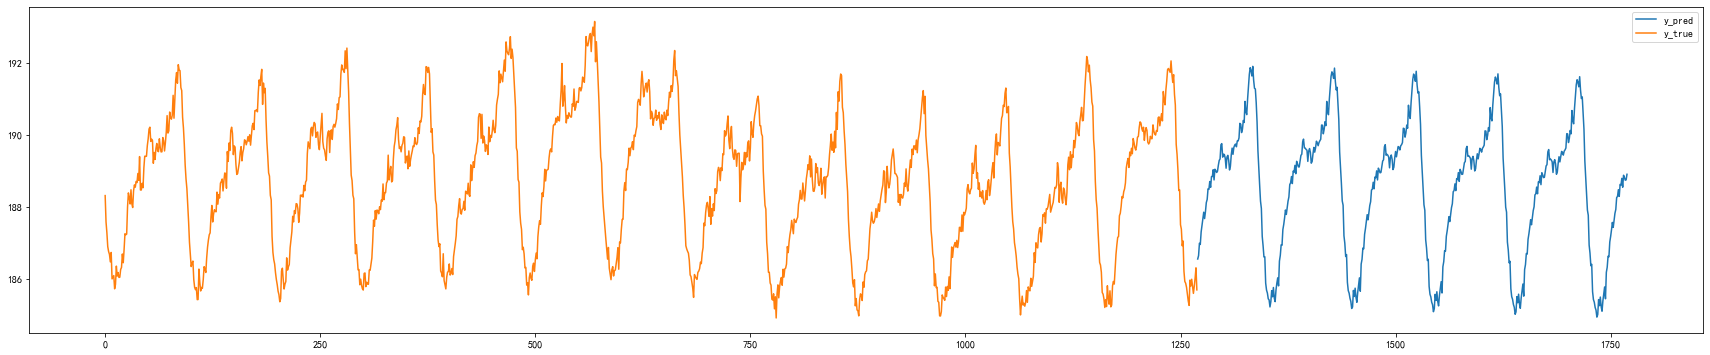

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.externals import joblib
#model = SARIMAX(diff_, order=(1, 0, 1), seasonal_order=(0, 0, 1, 95))
model = SARIMAX(df.iloc[:,0], order=(1, 1, 1), seasonal_order=(1, 1, 0, 95))#与上一句等价
results = model.fit()
joblib.dump(results, f'C:\\Users\\Administrator\\Desktop\\sARIMA模型.pkl')
predict_ = results.forecast(500)

fig, ax = plt.subplots(figsize=(30,6))
ax = predict_.plot(ax=ax)
df.iloc[:,0].plot(ax=ax)
plt.legend(['y_pred', 'y_true'])
plt.show()

## 模型评估
### 残差自相关性及正态性检验

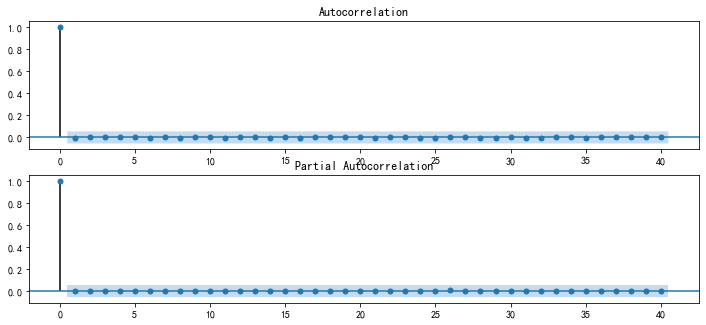

In [12]:
import scipy.stats as stats
#计算残差
resid=results.resid

#模型检验
#残差的acf和pacf
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(311)
fig=sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1) #squeeze()数组变为1维
ax2=fig.add_subplot(312)
fig=sm.graphics.tsa.plot_pacf(resid,lags=40,ax=ax2)
#残差自相关图断尾，所以残差序列为白噪声

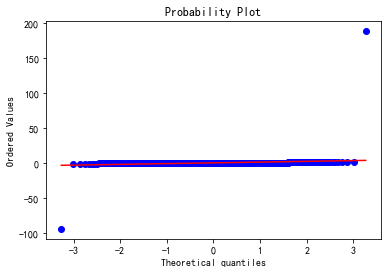

1.2093504122687142


In [13]:
fig=stats.probplot(resid,dist="norm", plot=plt)
plt.show()
print(sm.stats.durbin_watson(resid))#DW值接近于２时，说明残差不存在（一阶）自相关性